# **Hierarchical Clustering**

## **Agenda**

In this session, we will cover the following concepts with the help of a business use case:
* Hierarchical Clustering
* Types of Hierarchical Clustering
* Evaluate similarities between clusters

## <b> Hierarchical Clustering </b>


Hierarchical clustering is where we build a cluster tree (dendrogram) to represent data, where each group (node) is linked to two or more successor groups. 
* The groups are nested and organized as a tree, which ideally ends up as a meaningful classification scheme.
* Each node in the cluster tree contains a group of similar data; nodes are placed on the graph next to other similar nodes. 
* Clusters at one level are joined with clusters in the next level up, using a degree of similarity.
* The process carries on until all nodes are in the tree, which gives a visual snapshot of the data contained in the whole set. 
* The total number of clusters is not predetermined before you start the tree creation.

![clustergram](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.9_Unsupervised_Learning/Trainer_PPT_and_IPYNB/0.3_Hierarchical_Clustering/clustergram.png)

## <b> Implementing Hierarchical Clustering </b>


There are two major ways in which hierarchical clustering can be carried out:

1. Agglomerative or Bottom-Up Clustering
2. Divisive or Top-Down Clustering

### <b> Agglomerative (Bottom-Up) Clustering </b>

1. Start with each example in its own singleton cluster
2. At each time-step, greedily merge two most similar clusters
3. Stop when there is a single cluster of all examples, else go to two

### <b> Divisive (Top-Down) Clustering </b>


1. Start with all examples in the same cluster
2. At each time-step, remove the “outsiders” from the least cohesive cluster
3. Stop when each example is in its own singleton cluster, else go to two

### <b> Which One to Use? </b>

* Agglomerative Clustering is simpler than the divisive clustering to implement because for the latter, we need a second, flat clustering algorithm as a `subroutine`. 
* However, top-down routine has the advantage of being more efficient if we do not generate a complete hierarchy all the way down to individual document leaves. 
* For a fixed number of top levels, using an efficient flat algorithm like  $K$-means. Top-down algorithms are linear in the number of documents and clusters.
* There is also evidence that divisive algorithms produce more accurate hierarchies than bottom-up algorithms. In some circumstances according to the [Stanford University Review](https://nlp.stanford.edu/IR-book/html/htmledition/references-and-further-reading-17.html#sec:hclstfurther). 

### <b> Deciding (Dis)similarity between Clusters </b>

In both techniques, we discussed finding the similarity or dissmilarity between the two clusters. The question is, "How to measure them?"


Before any clustering is performed, it is required that you determine the **proximity matrix containing the distance between each point using a distance function**. 
Then, the matrix is updated to display the distance between each cluster. 
The following three methods differ in how the distance between each cluster is measured.

### <b> Dendrograms </b>

We can use a dendrogram to visualize the history of groupings and figure out the optimal number of clusters.
 - Determine the largest vertical distance that doesn’t intersect any of the other clusters
 - Draw a horizontal line at both extremities
 - The optimal number of clusters is equal to the number of vertical lines going through the horizontal line

For example, in the below case, best choice for no. of clusters will be 4.

![image_1](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.9_Unsupervised_Learning/Trainer_PPT_and_IPYNB/0.3_Hierarchical_Clustering/image_1.JPG)


## <b> Linkage Criteria </b>

### <b> Single Linkage </b>

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.

![image05](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.9_Unsupervised_Learning/Trainer_PPT_and_IPYNB/0.3_Hierarchical_Clustering/image05.png)


### <b> Complete Linkage </b>

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.

![image06](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.9_Unsupervised_Learning/Trainer_PPT_and_IPYNB/0.3_Hierarchical_Clustering/image06.png)


### <b> Average Linkage </b>

In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. For example, the distance between clusters “r” and “s” to the left is equal to the average length of each arrow between connecting the points of one cluster to the other.


![image07](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.9_Unsupervised_Learning/Trainer_PPT_and_IPYNB/0.3_Hierarchical_Clustering/image07.png)

### <b> Ward Linkage </b>
In ward linkage hierarchical clustering, the distance between clusters is the sum of squared differences within all clusters.


### <b> Single vs. Complete vs. Average Linkage: </b>

* Single
linkage sometimes produces chaining amongst the clusters. This means that several clusters may be joined together simply because one of their
cases is within close proximity of the case from a separate
cluster. This problem is specific to single linkage due to
the fact that the smallest distance between pairs is the
only value taken into consideration.
* In
complete linkage, outlying cases prevent close clusters
to merge together because the measure of the furthest
neighbor exacerbates the effects of outlying data.
* Average linkage is supposed to represent a
natural compromise between the linkage measures to
provide a more accurate evaluation of the distance
between the clusters. 

## <b> Distance Metric </b>
The method you use to calculate the distance between data points will affect the end result.
### <b>Euclidean Distance </b>
The shortest distance between two points. <br> 
For example, 
if x=(a,b) and y=(c,d), <br>
the Euclidean distance between x and y is √(a−c)²+(b−d)²
### <b> Manhattan Distance </b>
Imagine you were in the downtown center of a big city and you wanted to get from point A to point B. You wouldn’t be able to cut across buildings, rather you’d have to make your way by walking along the various streets. <br>
For example, if x=(a,b) and y=(c,d), <br> 
the Manhattan distance between x and y is |a−c|+|b−d|

## <b> Shortcomings </b>

One of the biggest drawbacks of hierarchical clustering is it is extremely calculation heavy. Therefore, they are not scalable. That also means that they are not very useful for larger datasets.

`Scipy` has a really convenient api for carrying out hierarchical clustering. Let's see how it works. We will start with necessary imports:

### Import Libraries

In [1]:
import pandas as pd, numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In the above code, we are using the sklearn library, which contains a lot of tools for machine learning and statistical modeling, including classification, regression, clustering, and dimensionality reduction.


In [2]:
iris = load_iris()

Load_iris is a function from sklearn that loads and returns the iris dataset. The libraries used above already contains it. Just by loading the library, a data frame named "iris" will be made available and can be used straight away.

In [3]:
X = iris.data
y = iris.target

In [4]:
#Import dendrogram and linkage module from scipy library
from scipy.cluster.hierarchy import dendrogram, linkage

In [5]:
#Generate the linkage matrix
Z = linkage(X, 'average')

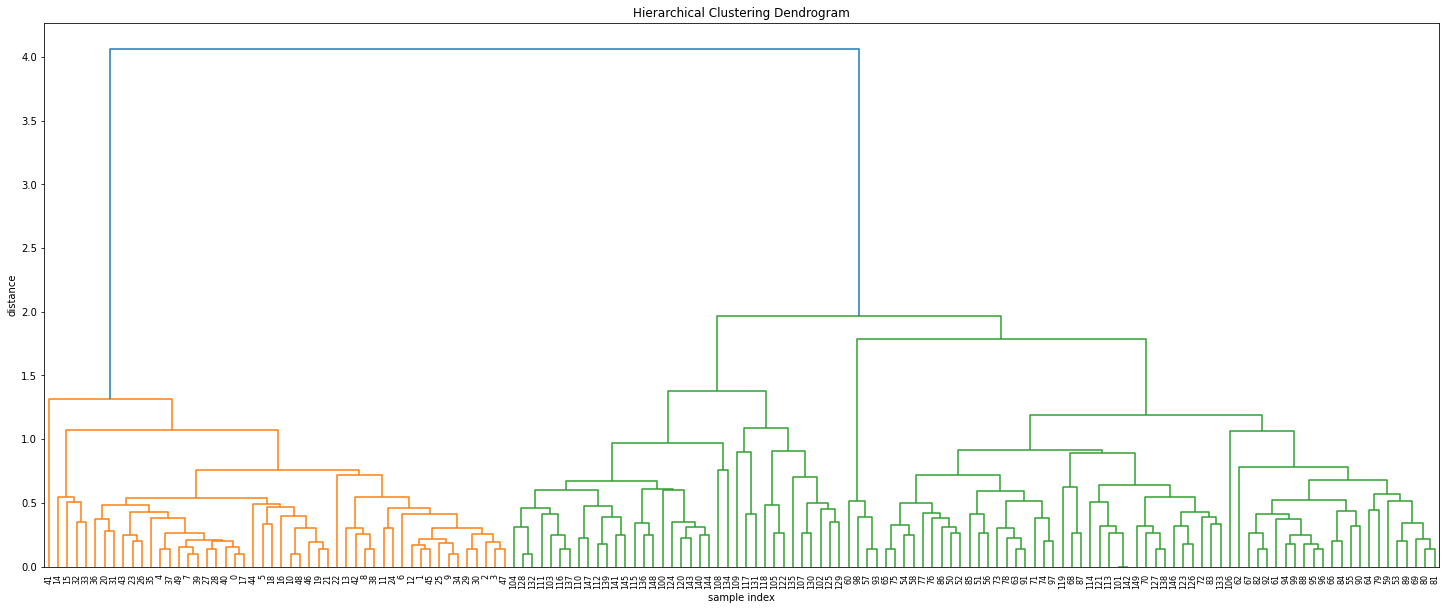

In [6]:
#Calculate full dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  #Rotates the x axis labels
    leaf_font_size=8.,  #Font size for the x axis labels
)
plt.show()

Now we are going to see the concept of Agglomerative (Bottom-Up) Clustering with a business use case.

### <b> Problem Statement: </b>
An ecommerce company has prepared a rough dataset containing shopping details of their customers, which includes CustomerID, Genre, Age, Annual Income (k$), Spending Score (1-100). The company is unable to target a specific set of customers with a particular set of SKUs.
 
### <b> Objective:</b>

 Segment customers into different groups based on their shopping trends.

### **Dataset**

Before reading the data from a .csv file, you need to download "housing_data.csv" dataset from the course resource and upload it into the lab.
We must use the Up arrow icon, which is shown in the left side under View icon. Click on the Up arrow icon and upload the file
wherever it is downloaded into your system.


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [8]:
customer_data = pd.read_csv('shopping_data.csv')

In the above code, pd.read_csv function is used to read the "shopping_data.csv" file, and customer_data is a variable that will store the data read by the .csv file.

In [9]:
customer_data.shape


(200, 5)

Here, shape is an attribute that returns a tuple representing the dimensionality of the customer_data. It is used to define the number of rows and columns in customer_data. 

In [10]:
customer_data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Our dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. To view the results in two-dimensional feature space, we will retain only two of these five columns. We can remove CustomerID column, Genre, and Age column. We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender. Execute the following script to filter the first three columns from our dataset:

In [11]:
data = customer_data.iloc[:, 3:5].values

Next, we need to know the clusters that we want our data to be split to. We will again use the scipy library to create the dendrograms for our dataset. Execute the following script to do so:

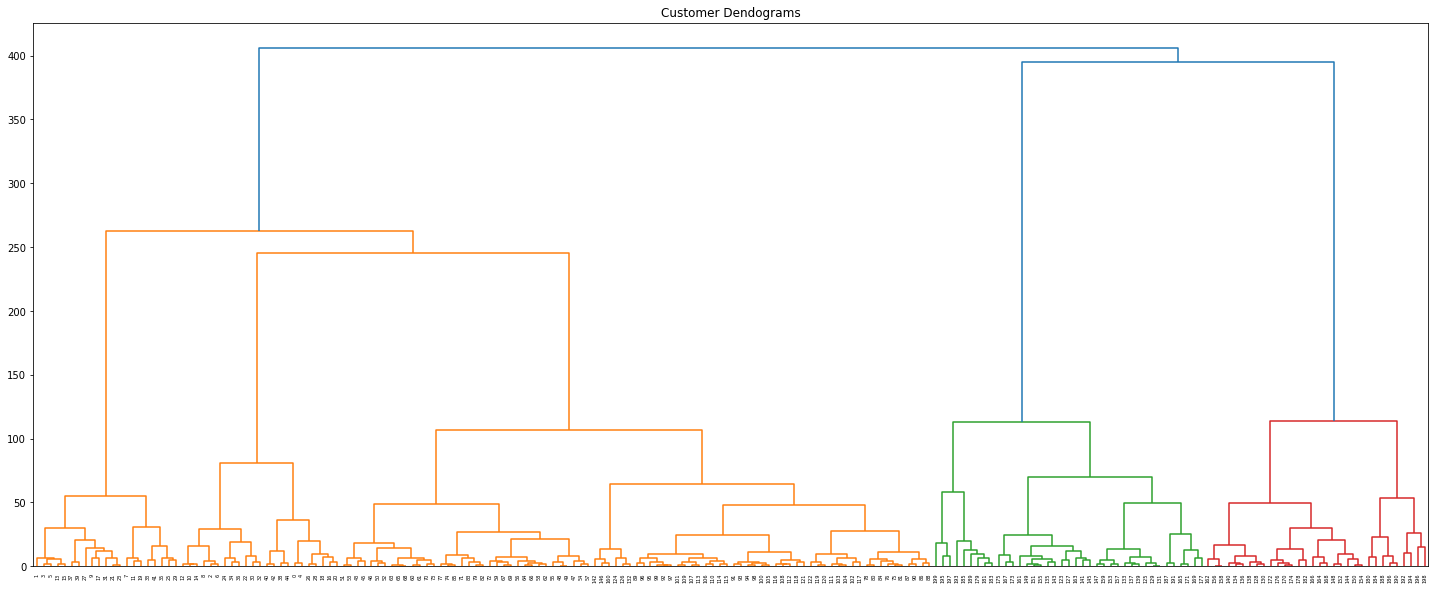

In [12]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(25, 10))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

If we draw a horizontal line that passes through longest distance without a horizontal line, we get 5 clusters.

We create an instance of Agglomerative Clustering using the euclidean distance as the measure of distance between points and ward linkage to calculate the proximity of clusters.

In [13]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

You can see the cluster labels from all of your data points. Since we had five clusters, we have five labels in the output i.e. 0 to 4.

As a final step, let's plot the clusters to see how actually our data has been clustered:

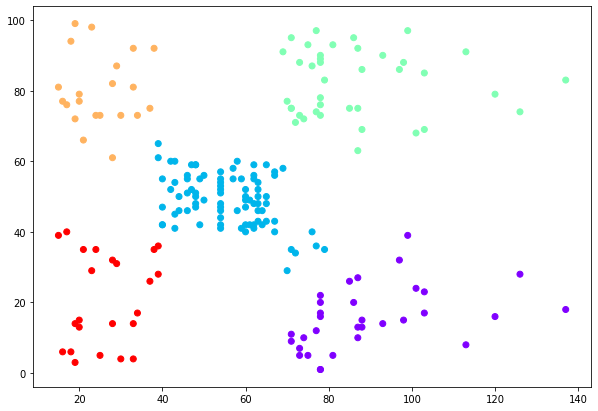

In [14]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

### **Conclusion**
When the shopping data is grouped using the agglomerative clustering technique, we can observe that there are five groups for consumers whose labels range from 0 to 4.

**Note: In this lesson, we saw the use of the unservised learning methods, but in the next lesson we will be working on "Time-Series Modelling".**

![Simplilearn_Logo](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Logo_Powered_By_Simplilearn/SL_Logo_1.png)